In [2]:
#Imported some basic libraries so as to be manipulate the data also scrap date from the yahoo finance platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [4]:
#Define starting and ending point of dataset. the bigger the better
start = '2010-01-01'
end = '2022-12-12'

df=data.DataReader('AAPL','yahoo',start,end)

In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-12-06,147.300003,141.919998,147.070007,142.910004,64727200.0,142.910004
2022-12-07,143.369995,140.000000,142.190002,140.940002,69721100.0,140.940002
2022-12-08,143.520004,141.100006,142.360001,142.649994,62128300.0,142.649994
2022-12-09,145.570007,140.899994,142.339996,142.160004,76069500.0,142.160004
2022-12-12,143.000000,141.070007,142.699997,142.182007,22194519.0,142.182007


In [6]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515212
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526476
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422664
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410790
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.453412


In [7]:
#cleaned the data by removing the columns I would not need.
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


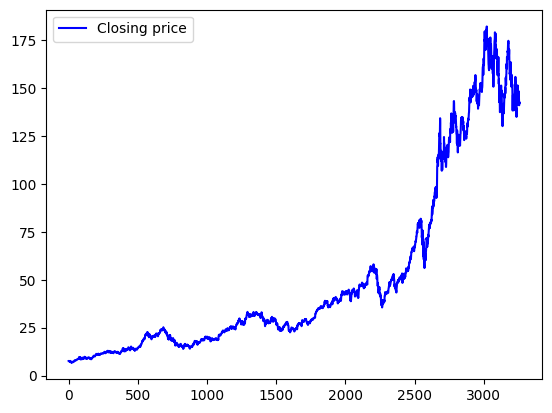

In [22]:
plt.plot(df.Close,'b',label='Closing price')
plt.legend()
plt.show()

In [23]:
df

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0
...,...,...,...,...,...
3254,147.300003,141.919998,147.070007,142.910004,64727200.0
3255,143.369995,140.000000,142.190002,140.940002,69721100.0
3256,143.520004,141.100006,142.360001,142.649994,62128300.0
3257,145.570007,140.899994,142.339996,142.160004,76069500.0


In [24]:
#to get the mean of the previous 100 closing values continuously
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3254    152.868199
3255    152.806899
3256    152.723399
3257    152.614599
3258    152.482919
Name: Close, Length: 3259, dtype: float64

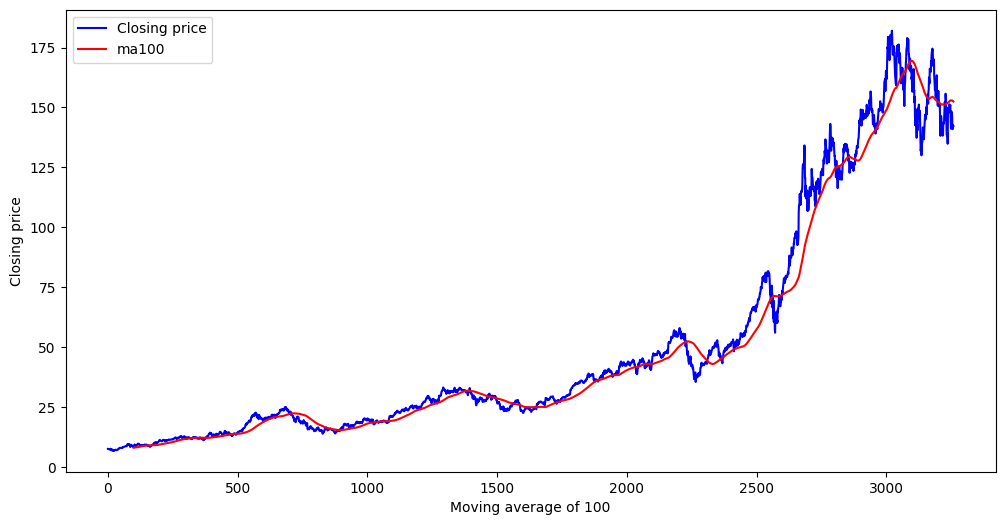

In [25]:
plt.figure(figsize = (12,6))
plt.plot(df.Close,'b',label='Closing price')
plt.plot(ma100,'r', label='ma100')
plt.ylabel('Closing price')
plt.xlabel('Moving average of 100')
plt.legend()
plt.show()

In [26]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3254    153.73475
3255    153.61785
3256    153.53075
3257    153.42785
3258    153.31451
Name: Close, Length: 3259, dtype: float64

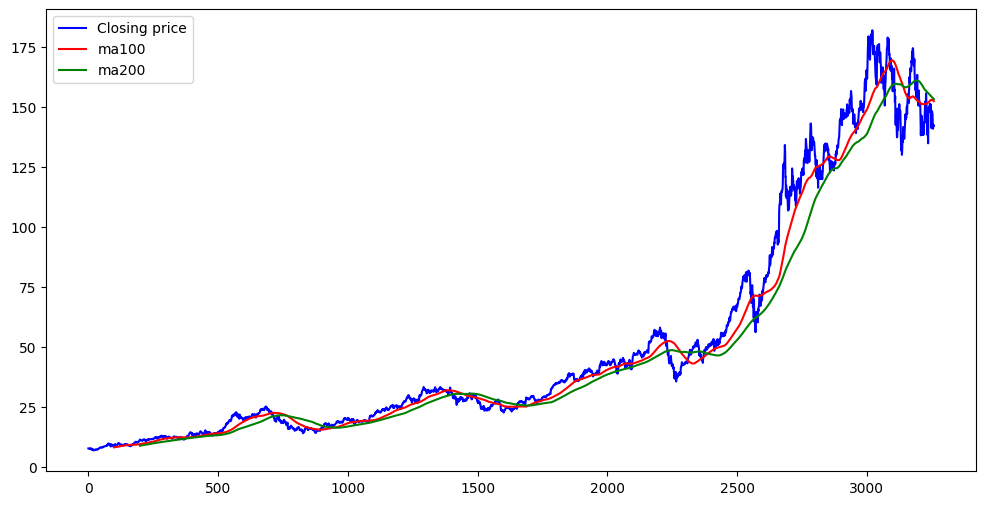

In [27]:
plt.figure(figsize = (12,6))
plt.plot(df.Close,'b',label='Closing price')
plt.plot(ma100,'r', label='ma100')
plt.plot(ma200,'g', label='ma200')
plt.legend()
plt.show()

In [28]:
df.shape

(3259, 5)

In [29]:
#splitting data into training and testing set
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [30]:
print(data_training.shape)
print(data_testing.shape)

(2281, 1)
(978, 1)


In [31]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [32]:
data_testing.head()

,Close
2281,39.075001
2282,38.669998
2283,41.312500
2284,41.610001
2285,41.630001


In [33]:
#The training data was then scaled down using the minmaxscaler to values between 0 and 1. 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [34]:
#Assigned the scaled down data to this variable
data_training_array =scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.61809915],
       [0.61213729],
       [0.63686432]])

In [35]:
data_training_array.shape

(2281, 1)

In [36]:
# The previous 100 days are x_train while the next day to be predicted is the y_train.
#This will go on iteratively for every 100 days in the dataset.
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
#convert to numpy array so as to be able to provide this data to our LSTM algorithm
x_train, y_train = np.array(x_train), np.array(y_train)

In [37]:
x_train.shape

(2181, 100, 1)

In [38]:
#Creating the ML model
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [39]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [40]:
#Summary of the LSTM model created
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
#compiling the model
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train,epochs=50)

Epoch 1/50
69/69 [==============================] - 35s 356ms/step - loss: 0.0292
Epoch 2/50
69/69 [==============================] - 24s 351ms/step - loss: 0.0072
Epoch 3/50
69/69 [==============================] - 27s 397ms/step - loss: 0.0062
Epoch 4/50
69/69 [==============================] - 29s 426ms/step - loss: 0.0054
Epoch 5/50
69/69 [==============================] - 27s 386ms/step - loss: 0.0062
Epoch 6/50
69/69 [==============================] - 25s 367ms/step - loss: 0.0047
Epoch 7/50
69/69 [==============================] - 29s 418ms/step - loss: 0.0043
Epoch 8/50
69/69 [==============================] - 38s 554ms/step - loss: 0.0036
Epoch 9/50
69/69 [==============================] - 30s 428ms/step - loss: 0.0038
Epoch 10/50
69/69 [==============================] - 28s 412ms/step - loss: 0.0038
Epoch 11/50
69/69 [==============================] - 26s 379ms/step - loss: 0.0037
Epoch 12/50
 5/69 [=>............................] - ETA: 32s - loss: 0.0033

In [41]:
#SAVING MODEL SO THAT WE CAN USE IT WITH STREAM LIT
model.save('keras_model.h5')

In [42]:
data_testing.head()

,Close
2276,39.205002
2277,38.325001
2278,38.480000
2279,38.174999
2280,39.439999


In [43]:
data_training.tail(100)

,Close
2176,54.040001
2177,54.485001
2178,54.924999
2179,55.744999
2180,56.257500
...,...
2271,38.072498
2272,37.500000
2273,38.267502
2274,38.735001


In [44]:
#TESTING
#have to fetch the previous 100 days date from training data to use it to predict the next value
past_100_days = data_training.tail(100)

In [47]:
#appended/conected the previous 100 days data with the testing data
final_df=past_100_days.append(data_testing, ignore_index=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4660\351597942.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing, ignore_index=True)


In [48]:
final_df.head()

,Close
0,54.040001
1,54.485001
2,54.924999
3,55.744999
4,56.257500


In [49]:
#scaling data down
input_data=scaler.fit_transform(final_df)
input_data

array([[0.126261  ],
       [0.12929931],
       [0.13230349],
       ...,
       [0.72115731],
       [0.76799524],
       [0.76990698]])

In [50]:
input_data.shape

(1076, 1)

In [51]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [52]:
x_test, y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(976, 100, 1)
(976,)


In [53]:
#making predictions
y_predicted=model.predict(x_test)


31/31 [==============================] - 6s 144ms/step


In [54]:
y_predicted.shape

(976, 1)

In [55]:
y_test

array([0.02497227, 0.0189639 , 0.02002218, 0.01793974, 0.02657676,
       0.02408467, 0.02131943, 0.03936161, 0.04139285, 0.04152941,
       0.04960314, 0.05460441, 0.05470684, 0.049074  , 0.04816933,
       0.04649653, 0.04898865, 0.04777672, 0.04883503, 0.04818639,
       0.04905691, 0.05093454, 0.04927882, 0.05253905, 0.05468976,
       0.05486046, 0.05578219, 0.05284628, 0.05595289, 0.05745499,
       0.05690876, 0.05518478, 0.05173679, 0.05243663, 0.06266108,
       0.06609201, 0.06745755, 0.07090551, 0.07498506, 0.07822822,
       0.0756849 , 0.07846719, 0.09029614, 0.08340019, 0.07945721,
       0.07612869, 0.07899633, 0.07942306, 0.08152257, 0.08372451,
       0.08846975, 0.09073996, 0.09132031, 0.09355637, 0.09884784,
       0.09782367, 0.09973542, 0.09688486, 0.09674831, 0.0973628 ,
       0.09739694, 0.10401981, 0.10526585, 0.10640949, 0.1114449 ,
       0.1108987 , 0.10768968, 0.1060169 , 0.10654605, 0.09982077,
       0.11663396, 0.11429546, 0.11873346, 0.11315182, 0.10355

In [56]:
y_predicted

array([[0.11485682],
       [0.11447559],
       [0.11415261],
       [0.11388251],
       [0.11365908],
       [0.11347717],
       [0.11333601],
       [0.11323154],
       [0.11316462],
       [0.11314964],
       [0.1131984 ],
       [0.11332463],
       [0.11355267],
       [0.11390415],
       [0.11438155],
       [0.11496611],
       [0.11563012],
       [0.11634353],
       [0.11708   ],
       [0.11781521],
       [0.1185298 ],
       [0.11920784],
       [0.11984125],
       [0.12042643],
       [0.1209639 ],
       [0.12146311],
       [0.12193561],
       [0.12239188],
       [0.12283581],
       [0.12326844],
       [0.1236954 ],
       [0.12412056],
       [0.12454167],
       [0.12494726],
       [0.12532268],
       [0.12567338],
       [0.12602526],
       [0.12640637],
       [0.12684412],
       [0.12736629],
       [0.12799816],
       [0.12874967],
       [0.12961793],
       [0.1306149 ],
       [0.1317429 ],
       [0.13297382],
       [0.13426046],
       [0.135

In [57]:
#GETTING THE VALUE USED TO SCALE DOWN
scaler.scale_

array([0.00682769])

In [58]:
scale_factor = 1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

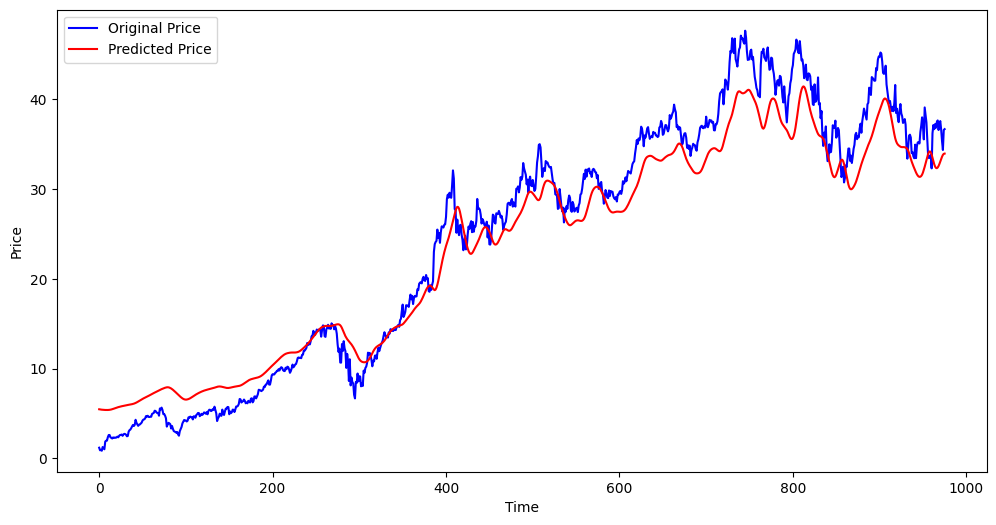

In [60]:
#plotting the prediction
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()